# Integration of Python with SQL

In [1]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cx_oracle

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from sqlalchemy import create_engine

# Replace with your Oracle XE credentials
username = "Jaya"
password = "Jaya"
host = "localhost"
port = "1521"
service = "XE"   # default Oracle XE service name

# Build connection string
dsn = f"Jaya:Jaya@localhost:1521/XE"

# Create engine
engine = create_engine(f"oracle+cx_oracle://{dsn}")

print("Connected Successfully")


Connected Successfully


# Testing the connection

In [5]:
import pandas as pd

# Test: list all tables you own
df_table1 = pd.read_sql("SELECT * FROM customers", engine)
print("customers",df_table1)

df_table2 = pd.read_sql("SELECT * FROM products", engine)
print("products",df_table2)

df_table3 = pd.read_sql("SELECT * FROM transactions", engine)
print("transactions",df_table3)

customers    customer_id    name  age gender location loyalty_tier
0            1   Alice   28      F   Nagpur         Gold
1            2     Bob   35      M     Pune       Silver
2            3  Angela   20      F   Mumbai       Bronze
3            4    John   55      M    Delhi         Gold
4            5   Larry   25      M   Nagpur         Gold
products    product_id     category  price  rating  stock_quantity
0         101  Electronics   1500     4.5              20
1         102     Clothing    500     4.0              50
2         103       Beauty    600     3.8              30
3         104       Health   2000     4.8              50
4         105    Furniture   5000     4.2              10
transactions    transaction_id  customer_id  amount payment_method  is_fraud  \
0            5001            1    1500    Credit Card         0   
1            5002            2    2000    Credit Card         0   
2            5003            3     600    Credit Card         1   
3         

In [6]:
# Loading data into Pandas
df = pd.read_sql("SELECT * FROM customers", engine)
print(df.head())

df = pd.read_sql("SELECT * FROM products", engine)
print(df.head())

df = pd.read_sql("SELECT * FROM transactions", engine)
print(df.head())

   customer_id    name  age gender location loyalty_tier
0            1   Alice   28      F   Nagpur         Gold
1            2     Bob   35      M     Pune       Silver
2            3  Angela   20      F   Mumbai       Bronze
3            4    John   55      M    Delhi         Gold
4            5   Larry   25      M   Nagpur         Gold
   product_id     category  price  rating  stock_quantity
0         101  Electronics   1500     4.5              20
1         102     Clothing    500     4.0              50
2         103       Beauty    600     3.8              30
3         104       Health   2000     4.8              50
4         105    Furniture   5000     4.2              10
   transaction_id  customer_id  amount payment_method  is_fraud  \
0            5001            1    1500    Credit Card         0   
1            5002            2    2000    Credit Card         0   
2            5003            3     600    Credit Card         1   
3            5004            4    5000    

# Joining Tables

In [7]:
query = """
SELECT t.transaction_id, t.customer_id, t.amount, t.payment_method, t.is_fraud,
       c.age, c.gender, c.location, c.loyalty_tier,
       p.category, p.price, p.rating
FROM transactions t
JOIN customers c ON t.customer_id = c.customer_id
JOIN products p ON t.transaction_id = p.product_id
"""
df_full = pd.read_sql(query, engine)
print(df_full.head())

Empty DataFrame
Columns: [transaction_id, customer_id, amount, payment_method, is_fraud, age, gender, location, loyalty_tier, category, price, rating]
Index: []


# Now with a larger datasets

In [8]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Defining Categories
payment_methods = ["Credit Card", "Debit Card", "UPI", "NetBanking", "Cash"]
locations = ["Nagpur", "Mumbai", "Delhi", "Pune", "Bangalore"]
loyalty_tiers = ["Bronze", "Silver", "Gold", "Platinum"]
categories = ["Electronics", "Clothing", "Beauty", "Health", "Furniture"]

# Generating 120 transactions
n_rows = 120
df = pd.DataFrame({
    "transaction_id": np.arange(5001, 5001+n_rows),
    "customer_id": np.random.randint(1, 21, size=n_rows),  # 20 customers
    "amount": np.random.randint(100, 5000, size=n_rows),
    "payment_method": np.random.choice(payment_methods, size=n_rows),
    "is_fraud": np.random.choice([0,1], size=n_rows, p=[0.85,0.15]),  # 15% fraud
    "age": np.random.randint(18, 65, size=n_rows),
    "gender": np.random.choice(["Male","Female"], size=n_rows),
    "location": np.random.choice(locations, size=n_rows),
    "loyalty_tier": np.random.choice(loyalty_tiers, size=n_rows),
    "category": np.random.choice(categories, size=n_rows),
    "price": np.random.randint(50, 2000, size=n_rows),
    "rating": np.random.randint(1, 6, size=n_rows)  # 1–5 stars
})

print(df.head(10))   # Show first 10 rows
print("Total rows:", len(df))

   transaction_id  customer_id  amount payment_method  is_fraud  age  gender  \
0            5001            7     963     NetBanking         0   52    Male   
1            5002           20    2890            UPI         0   40  Female   
2            5003           15     663    Credit Card         0   46    Male   
3            5004           11    4291            UPI         0   60    Male   
4            5005            8    1857    Credit Card         0   28    Male   
5            5006            7    1778           Cash         0   35  Female   
6            5007           19    3342     Debit Card         0   64  Female   
7            5008           11    4736     Debit Card         0   29  Female   
8            5009           11    1159     Debit Card         0   26  Female   
9            5010            4    1822            UPI         0   27  Female   

    location loyalty_tier     category  price  rating  
0     Mumbai       Bronze  Electronics   1876       3  
1      

In [9]:
# Encoding categorical variables
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_cols = ['payment_method','gender','location','loyalty_tier','category']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [10]:
print(df.head())

   transaction_id  customer_id  amount payment_method  is_fraud  age  gender  \
0            5001            7     963     NetBanking         0   52    Male   
1            5002           20    2890            UPI         0   40  Female   
2            5003           15     663    Credit Card         0   46    Male   
3            5004           11    4291            UPI         0   60    Male   
4            5005            8    1857    Credit Card         0   28    Male   

  location loyalty_tier     category  price  rating  
0   Mumbai       Bronze  Electronics   1876       3  
1     Pune       Bronze       Health    624       1  
2   Nagpur       Bronze    Furniture    293       4  
3   Nagpur       Silver       Beauty    586       2  
4     Pune       Bronze  Electronics   1675       3  


In [11]:
# Defining Features and Targets
# Build features dynamically
available_features = [col for col in ['amount','age','price','rating'] if col in df_encoded.columns]
X = df_encoded[available_features + [col for col in df_encoded.columns if col not in ['is_fraud','transaction_id','customer_id']]]
y = df_encoded['is_fraud']


# Select features and target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (84, 24)
Test set shape: (36, 24)


# Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))


Logistic Regression
Accuracy: 0.7777777777777778
Precision: 0.0
Recall: 0.0
ROC AUC: 0.45161290322580644

Random Forest
Accuracy: 0.8611111111111112
Precision: 0.0
Recall: 0.0
ROC AUC: 0.5

SVM
Accuracy: 0.8611111111111112
Precision: 0.0
Recall: 0.0
ROC AUC: 0.5


# Now, Visualizing Performance

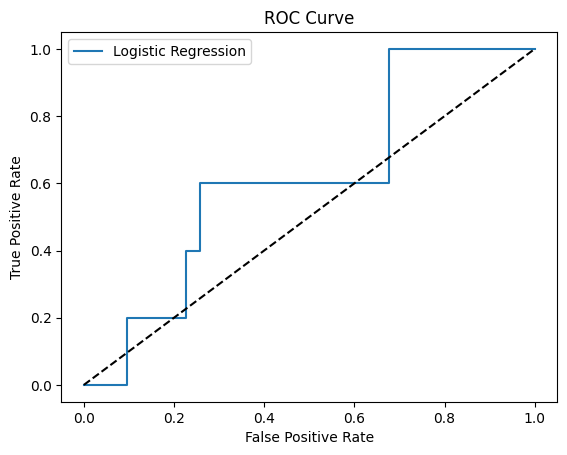

In [13]:
# ROC Curve:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix

# Example for Logistic Regression
y_pred_prob = models["Logistic Regression"].predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

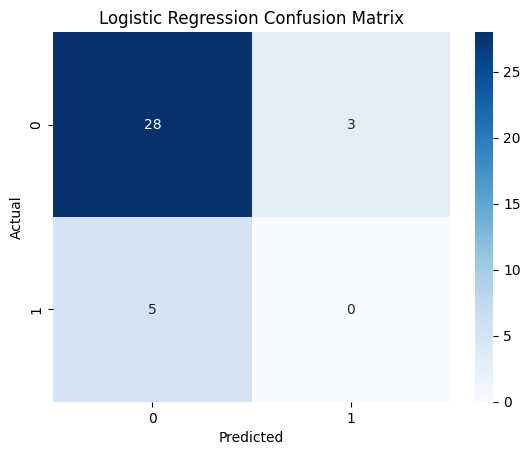

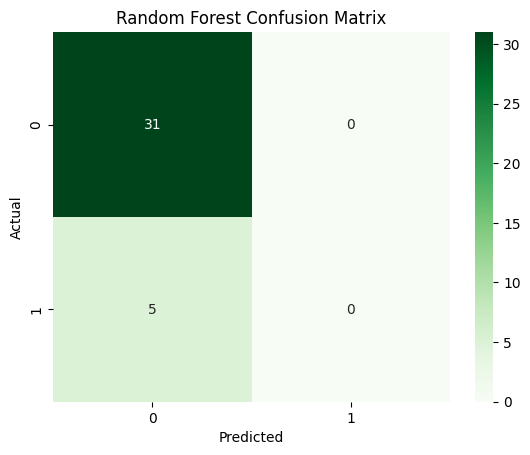

In [14]:
# Confusion Matrix:
import seaborn as sns

# Logistic Regression confusion matrix
cm_lr = confusion_matrix(y_test, models["Logistic Regression"].predict(X_test))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest confusion matrix
cm_rf = confusion_matrix(y_test, models["Random Forest"].predict(X_test))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

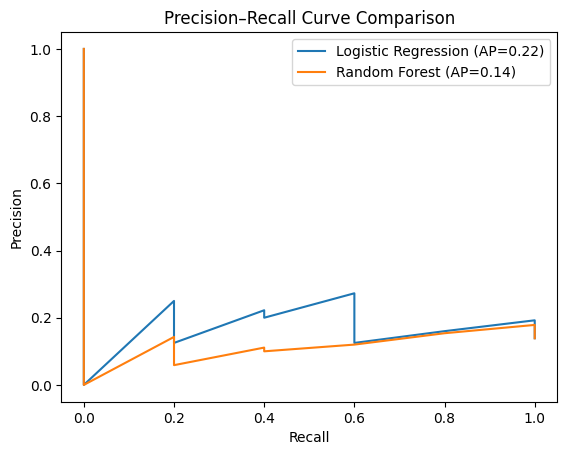

In [15]:
# Precision Recall Curve:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Logistic Regression
y_pred_prob_lr = models["Logistic Regression"].predict_proba(X_test)[:,1]
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_prob_lr)
ap_lr = average_precision_score(y_test, y_pred_prob_lr)

# Random Forest
y_pred_prob_rf = models["Random Forest"].predict_proba(X_test)[:,1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_prob_rf)
ap_rf = average_precision_score(y_test, y_pred_prob_rf)

# Plot
plt.plot(recall_lr, precision_lr, label=f"Logistic Regression (AP={ap_lr:.2f})")
plt.plot(recall_rf, precision_rf, label=f"Random Forest (AP={ap_rf:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve Comparison")
plt.legend()
plt.show()

# Fraud Risk Score (Probability of Fraud)

In [16]:
fraud_risk = models["Random Forest"].predict_proba(X_test)[:,1]

# Purchase likelihood (probability of non-fraud)
purchase_likelihood = models["Random Forest"].predict_proba(X_test)[:,0]

df_results = pd.DataFrame({
    "Fraud Risk Score": fraud_risk,
    "Purchase Likelihood": purchase_likelihood,
    "True Label": y_test
})
print(df_results.head())

    Fraud Risk Score  Purchase Likelihood  True Label
44              0.15                 0.85           0
47              0.33                 0.67           0
4               0.13                 0.87           0
55              0.13                 0.87           0
26              0.23                 0.77           0


# CLUSTERING

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Loading Dataset
np.random.seed(42)
locations = ["Nagpur", "Mumbai", "Delhi", "Pune", "Bangalore"]
loyalty_tiers = ["Bronze", "Silver", "Gold", "Platinum"]
categories = ["Electronics", "Clothing", "Beauty", "Health", "Furniture"]

n_rows = 200
df = pd.DataFrame({
    "customer_id": np.random.randint(1, 51, size=n_rows),  # 50 customers
    "amount": np.random.randint(100, 5000, size=n_rows),
    "age": np.random.randint(18, 65, size=n_rows),
    "location": np.random.choice(locations, size=n_rows),
    "loyalty_tier": np.random.choice(loyalty_tiers, size=n_rows),
    "category": np.random.choice(categories, size=n_rows),
    "rating": np.random.randint(1, 6, size=n_rows)
})

# Encoding category features
categorical_cols = ['location','loyalty_tier','category']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Scaling
X = df_encoded.drop(columns=['customer_id'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Now clustering
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=4, random_state=42, batch_size=100)

labels_kmeans = kmeans.fit_predict(X_scaled)
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
print("KMeans Silhouette Score:", silhouette_kmeans)

# DESCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan) if len(set(labels_dbscan)) > 1 else "N/A"
print("DBSCAN Silhouette Score:", silhouette_dbscan)

# Labels to Customers
df['Cluster_KMeans'] = labels_kmeans
df['Cluster_DBSCAN'] = labels_dbscan
print(df.head(10))


KMeans Silhouette Score: 0.11121640013827218
DBSCAN Silhouette Score: N/A
   customer_id  amount  age   location loyalty_tier     category  rating  \
0           39    2098   61     Mumbai     Platinum  Electronics       3   
1           29    3545   22     Mumbai     Platinum       Health       3   
2           15    3843   56  Bangalore     Platinum  Electronics       5   
3           43    1595   21  Bangalore       Bronze       Health       1   
4            8    3404   23  Bangalore         Gold  Electronics       5   
5           21    3863   62      Delhi     Platinum     Clothing       5   
6           39    1953   49  Bangalore         Gold    Furniture       3   
7           19    4759   47     Nagpur         Gold       Beauty       2   
8           23    1391   64       Pune       Bronze       Health       1   
9           11    3681   52     Nagpur     Platinum    Furniture       3   

   Cluster_KMeans  Cluster_DBSCAN  
0               3              -1  
1               2

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 512 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


# Exporting Data to Visualize in Power BI

In [19]:
import pandas as pd

# --- Step 1: Assume outputs from your modules ---
# Replace these with actual outputs from classification_model.py, regression_model.py, clustering_model.py

# Example: Classification outputs
classification_results = pd.DataFrame({
    "transaction_id": [6001, 6002, 6003],
    "customer_id": [12, 7, 15],
    "fraud_risk_score": [0.87, 0.05, 0.42],
    "purchase_likelihood": [0.13, 0.95, 0.58]
})

# Example: Regression outputs
regression_results = pd.DataFrame({
    "transaction_id": [6001, 6002, 6003],
    "predicted_amount": [2450, 3100, 1800]
})

# Example: Clustering outputs
clustering_results = pd.DataFrame({
    "customer_id": [12, 7, 15],
    "cluster_id": [2, 1, 0]
})

# --- Step 2: Merge outputs into unified dataframe ---
df_pipeline = classification_results.merge(regression_results, on="transaction_id")
df_pipeline = df_pipeline.merge(clustering_results, on="customer_id")

# --- Step 3: Save to CSV for Power BI ---
df_pipeline.to_csv("pipeline_outputs.csv", index=False)

print("Unified pipeline outputs saved to pipeline_outputs.csv")
print(df_pipeline.head())

Unified pipeline outputs saved to pipeline_outputs.csv
   transaction_id  customer_id  fraud_risk_score  purchase_likelihood  \
0            6001           12              0.87                 0.13   
1            6002            7              0.05                 0.95   
2            6003           15              0.42                 0.58   

   predicted_amount  cluster_id  
0              2450           2  
1              3100           1  
2              1800           0  
